In [30]:
import numpy as np
import math

#https://habr.com/ru/post/148325/
#истина, если точка C лежит слева или на векторе AB
def isLeftSide(a, b, c):
    return (c[0] - a[0]) * (b[1] - a[1]) - (c[1] - a[1]) * (b[0] - a[0]) >= 0

#площадь треугольника
def area(a, b, c):
    def distance(p1, p2):
        return math.hypot(p1[0]-p2[0], p1[1]-p2[1])

    side_a = distance(a, b)
    side_b = distance(b, c)
    side_c = distance(c, a)
    s = 0.5 * ( side_a + side_b + side_c)
    return math.sqrt(s * (s - side_a) * (s - side_b) * (s - side_c))

def nextPoint(points, l, r):
    res = []
    points.sort(key = lambda x : area(l, r, x), reverse=True)
    pi = points.pop(0)
    #print(pi)
    res.append(pi)
    left = []
    right = []
    for p in points:
        if isLeftSide(l, pi, p):
            left.append(p)
        elif isLeftSide(pi, r, p):
            right.append(p)
    
    if (left):
        res += nextPoint(left, l, pi)
    if (right):    
        res += nextPoint(right, pi, r)
    return res

def quickHull(points):
    points.sort(key = lambda x : x[0])
    left = points.pop(0)
    right = points.pop(-1)
    up = []
    down = []
    res = [left]

    for p in points:
        if isLeftSide(left, right, p):
            up.append(p)
        else:
            down.append(p)
    
    if (up):
        res += nextPoint(up, left, right)
    
    res.sort(key = lambda x : x[0]) #для вывода точек в правильной последовательности
    res.append(right)
    
    if(down):
        t = nextPoint(down, right, left)
        t.sort(key = lambda x : x[0], reverse=True)
        res += t
    return res

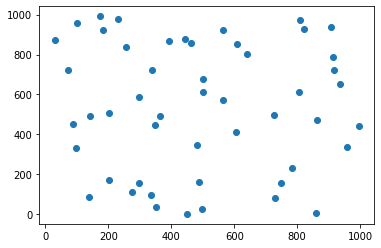

In [31]:
import random 
import matplotlib.pyplot as plt

N = 50
x = random.sample(range(1000), N)
y = random.sample(range(1000), N)
plt.scatter(x, y)

[(29, 873), (98, 331), (140, 85), (450, 0), (860, 7), (996, 443), (907, 937), (808, 975), (175, 992), (100, 959)]


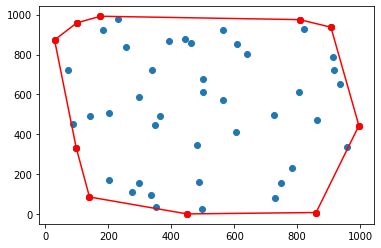

In [32]:
points = list(zip(x, y))
res = quickHull(points)
print(res)
x_res = [row[0] for row in res]
y_res = [row[1] for row in res]
#plt.plot(x_res, y_res)
plt.scatter(x, y)
for i in range(0, len(res)):
    plt.plot(x_res[i:i+2], y_res[i:i+2], 'ro-')
plt.plot([x_res[-1], x_res[0]], [y_res[-1], y_res[0]], 'ro-')

[(0, 1), (1.2, 1), (1.5, 1), (2, 1), (3, 1), (3, 1.3), (3, 2), (2.5, 2.5), (2, 3), (0.5, 2.5), (0, 2), (0, 1.25)]


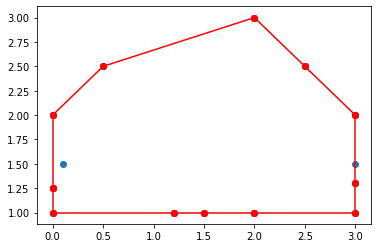

In [37]:
x = [0, 0, 0.1, 0.5, 2, 2.5, 3, 3, 2, 1.5, 1.2, 0, 3,  2.999]
y = [1, 2, 1.5, 2.5, 3, 2.5, 2, 1, 1, 1, 1, 1.25, 1.3, 1.5]
points = list(zip(x, y))
res = quickHull(points)
print(res)
x_res = [row[0] for row in res]
y_res = [row[1] for row in res]
plt.scatter(x, y)
for i in range(0, len(res)):
    plt.plot(x_res[i:i+2], y_res[i:i+2], 'ro-')
plt.plot([x_res[-1], x_res[0]], [y_res[-1], y_res[0]], 'ro-')